In [2]:
# Análise Comparativa - Titanic

## 1. Importação de Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [4]:
# Carregar o conjunto de dados
df = pd.read_csv('../data/raw/data.csv')

# Exibir as primeiras linhas do DataFrame
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Verificar a quantidade de dados faltantes por coluna
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data_percentage = (missing_data / len(df)) * 100

# Exibir dados faltantes
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
print(missing_data_summary)

             Missing Values  Percentage
age                     177   19.865320
embarked                  2    0.224467
deck                    688   77.216611
embark_town               2    0.224467


In [7]:
# Definir um limite de porcentagem para remoção de colunas
threshold = 0.5  # Excluir colunas com mais de 50% de valores ausentes
df = df.loc[:, df.isnull().mean() < threshold]

In [8]:
# Imputação para 'age' usando a média
imputer_age = SimpleImputer(strategy='mean')
df['age'] = imputer_age.fit_transform(df[['age']])

# Imputação para 'embarked' usando o modo (moda)
imputer_embarked = SimpleImputer(strategy='most_frequent')
df['embarked'] = imputer_embarked.fit_transform(df[['embarked']])

# Exibir as alterações
print("Dados faltantes após imputação:")
print(df.isnull().sum())

Dados faltantes após imputação:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


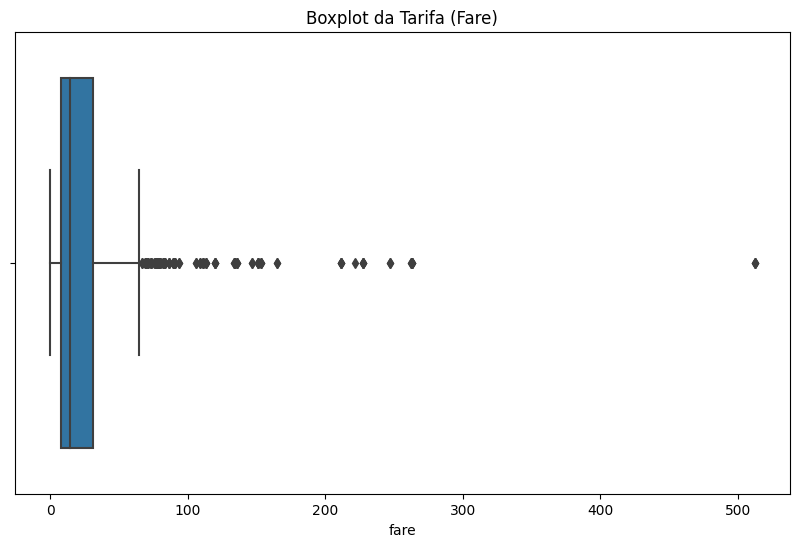

In [9]:
# Usar boxplot para visualizar outliers na coluna 'fare'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare'])
plt.title('Boxplot da Tarifa (Fare)')
plt.show()

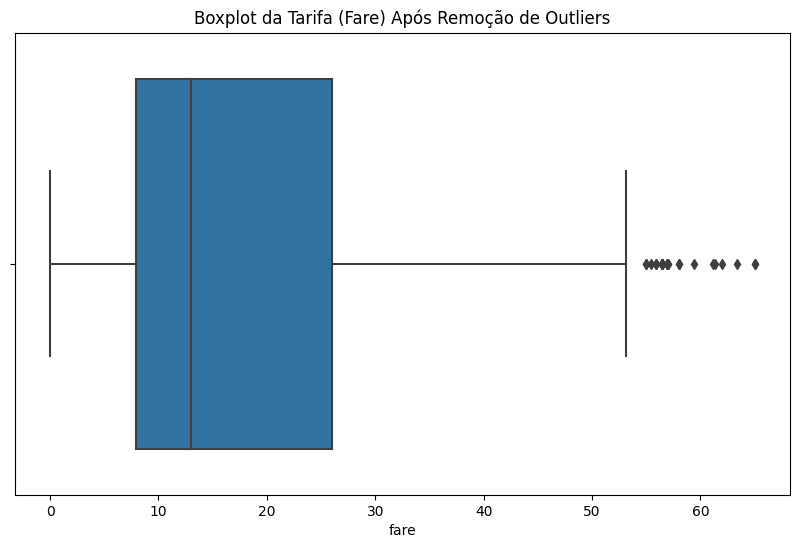

In [10]:
# Definindo o limite superior para remoção de outliers na coluna 'fare'
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removendo outliers
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# Verificar a nova distribuição da tarifa
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare'])
plt.title('Boxplot da Tarifa (Fare) Após Remoção de Outliers')
plt.show()

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Codificação de variáveis categóricas usando OneHotEncoder para 'embarked' e 'sex'
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[['embarked', 'sex']])

# Criar um DataFrame com as variáveis codificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['embarked', 'sex']))

# Concatenar as variáveis codificadas ao DataFrame original e remover as colunas originais
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df.drop(['embarked', 'sex'], axis=1, inplace=True)

# Exibir o DataFrame após codificação
df.head()

/home/marielle_u/.cache/pypoetry/virtualenvs/src-KXk9-FQM-py3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S,sex_male
0,0,3,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False,0.0,1.0,1.0
1,1,3,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True,0.0,1.0,0.0
2,1,1,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False,0.0,1.0,0.0
3,0,3,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True,0.0,1.0,1.0
4,0,3,29.699118,0,0,8.4583,Third,man,True,Queenstown,no,True,1.0,0.0,1.0


In [13]:
# Exemplo de codificação ordinal para 'pclass'
ordinal_mapping = {1: '1st', 2: '2nd', 3: '3rd'}
df['pclass'] = df['pclass'].map(ordinal_mapping)

# Exibir o DataFrame após codificação ordinal
df.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S,sex_male
0,0,3rd,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False,0.0,1.0,1.0
1,1,3rd,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True,0.0,1.0,0.0
2,1,1st,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False,0.0,1.0,0.0
3,0,3rd,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True,0.0,1.0,1.0
4,0,3rd,29.699118,0,0,8.4583,Third,man,True,Queenstown,no,True,1.0,0.0,1.0


In [14]:
# Conversão da coluna 'fare' para tipo numérico (float)
df['fare'] = df['fare'].astype(float)

# Exibir os tipos de dados
print(df.dtypes)

survived         int64
pclass          object
age            float64
sibsp            int64
parch            int64
fare           float64
class           object
who             object
adult_male        bool
embark_town     object
alive           object
alone             bool
embarked_Q     float64
embarked_S     float64
sex_male       float64
dtype: object
